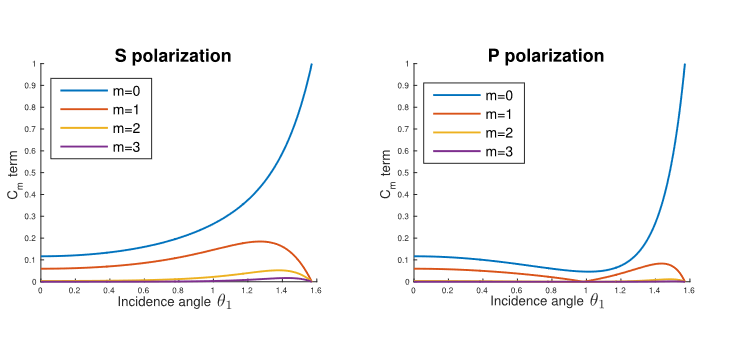

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# s = perpendicular to plane containing normal / incident direction
# p = parallel to plane containing normal / incident direction
# eta_1 = indident medium, eta_2 = transmitting medium
def fresnel(cos_theta_i, eta_1, eta_2):
  eta = eta_2 / eta_1
  cos_theta_i = np.clip(cos_theta_i, 0.0, 1.0)
  sin2_theta_i = 1.0 - cos_theta_i * cos_theta_i
  sin2_theta_t = sin2_theta_i / (eta * eta)
  # may be a complex number / not an angle if the relative IOR is complex
  cos_theta_t = np.emath.sqrt(1.0 - sin2_theta_t)

  rs = (eta_1 * cos_theta_i - eta_2 * cos_theta_t) / (eta_1 * cos_theta_i + eta_2 * cos_theta_t)
  rp = (eta_2 * cos_theta_i - eta_1 * cos_theta_t) / (eta_2 * cos_theta_i + eta_1 * cos_theta_t)

  # compute square modulus
  Rs = np.clip(np.abs(rs) ** 2, 0.0, 1.0)
  Ts = 1.0 - Rs
  Rp = np.clip(np.abs(rp) ** 2, 0.0, 1.0)
  Tp = 1.0 - Rp

  return Rs, Ts, Rp, Tp, cos_theta_t

# calculate c_0, c_1, ..., c_k for s-polarized light
# and c_0, c_1, ..., c_k for p-polarized light
# returns as a (k+1) * 2 matrix
def calculate_c(k, theta_i, eta_1, eta_2, eta_3):
  cos_theta_i = np.cos(theta_i)

  R12_s, T12_s, R12_p, T12_p, cos_theta_2 = fresnel(cos_theta_i, eta_1, eta_2)
  # print("1|2 boundary: ", R12_s, T12_s, R12_p, T12_p)

  # might not work if eta_2 < eta_1 due to total internal reflection (we can safely ignore this case since eta_1 should basically always just be air)
  # vertical angles
  R23_s, T23_s, R23_p, T23_p, _ = fresnel(cos_theta_2, eta_2, eta_3)
  # print("2|3 boundary: ", R23_s, T23_s, R23_p, T23_p)

  # reflection -> vertical angles
  R21_s, T21_s, R21_p, T21_p, _ = fresnel(cos_theta_2, eta_2, eta_1)
  # print("2|1 boundary: ", R21_s, T21_s, R21_p, T21_p)


  Rstar_s = T12_s * T21_s * R23_s / (1.0 - R23_s * R21_s)
  C0_s = R12_s + Rstar_s
  C_s = [C0_s]

  for i in range(1, k+1):
    Ci_s = (np.sqrt(R23_s * R21_s) ** i) * (Rstar_s - np.sqrt(T12_s * T21_s))
    if i == 1:
      print(R21_s, R12_s)
      print(T12_s, T21_s, R23_s, R21_s, Rstar_s)
      print(Ci_s)
    C_s.append(Ci_s)

  Rstar_p = T12_p * T21_p * R23_p / (1.0 - R23_p * R21_p)
  C0_p = R12_p + Rstar_p
  C_p = [C0_p]

  for i in range(1, k+1):
    Ci_p = (np.sqrt(R23_p * R21_p) ** i) * (Rstar_p - np.sqrt(T12_p * T21_p))
    C_p.append(Ci_p)

  return C_s, C_p

In [ ]:
print(fresnel(np.cos(0.0), 1.0, 1.33))

(0.020059312199524774, 0.9799406878004753, 0.020059312199524774, 0.9799406878004753, 1.0)


In [ ]:
eta_1 = 1.0 # air ior
eta_2 = 1.5 # thin film ior
eta_3 = 1.2 + 0.5j # complex ior -> conductor

# plot over theta
theta = np.linspace(0.0, np.pi / 2, 100)
C = []
for angle in theta:
  C_s, C_p = calculate_c(3, angle, eta_1, eta_2, eta_3)
  C.append(C_s)

C = np.array(C)

0.04000000000000001 0.04000000000000001
0.96 0.96 0.04509283819628648 0.04000000000000001 0.0416326530612245
-0.03900319775599609
0.04001342901074102 0.04001342901074102
0.959986570989259 0.959986570989259 0.04510358660750992 0.04001342901074102 0.04164145486897227
-0.03901344890884227
0.040053744227513566 0.04005374422751356
0.9599462557724865 0.9599462557724865 0.045135841954230045 0.040053744227513566 0.04166786419960099
-0.039044215308166534
0.04012103030326675 0.04012103030326671
0.9598789696967333 0.9598789696967333 0.04518963456114584 0.04012103030326675 0.04171189273143141
-0.0390955357826915
0.040215428657722006 0.04021542865772204
0.9597845713422779 0.959784571342278 0.04526501492101154 0.040215428657722006 0.04177355978181857
-0.039167475067997365
0.04033713797623013 0.040337137976230106
0.9596628620237699 0.9596628620237698 0.04536205362116049 0.04033713797623013 0.04185289208598856
-0.03926012383746309
0.04048641491147316 0.04048641491147316
0.9595135850885268 0.9595135850

0.08163265306122451
1.0


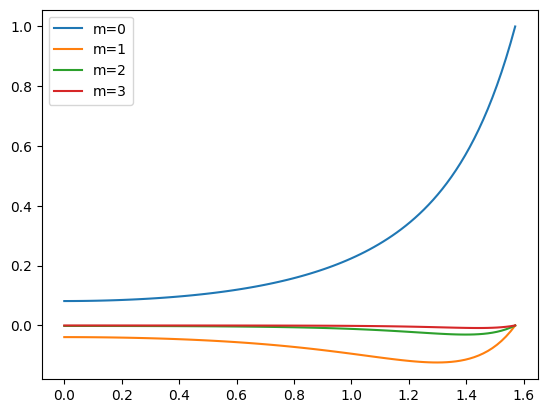

In [ ]:
C0 = C[:, 0]
C1 = C[:, 1]
C2 = C[:, 2]
C3 = C[:, 3]
print(C0[0])
print(C0[-1])

plt.plot(theta, C0, label='m=0')
plt.plot(theta, C1, label='m=1')
plt.plot(theta, C2, label='m=2')
plt.plot(theta, C3, label='m=3')
plt.legend()
plt.show()

In [ ]:
# s = perpendicular to plane containing normal / incident direction
# p = parallel to plane containing normal / incident direction
# eta_1 = indident medium, eta_2 = transmitting medium
def fresnel_coeffs(cos_theta_i, eta_1, eta_2):
  eta = eta_2 / eta_1
  cos_theta_i = np.clip(cos_theta_i, 0.0, 1.0)
  sin2_theta_i = 1.0 - cos_theta_i * cos_theta_i
  sin2_theta_t = sin2_theta_i / (eta * eta)
  # may be a complex number / not an angle if the relative IOR is complex
  cos_theta_t = np.emath.sqrt(1.0 - sin2_theta_t)

  rs = (eta_1 * cos_theta_i - eta_2 * cos_theta_t) / (eta_1 * cos_theta_i + eta_2 * cos_theta_t)
  rp = (eta_2 * cos_theta_i - eta_1 * cos_theta_t) / (eta_2 * cos_theta_i + eta_1 * cos_theta_t)
  ts = 2.0 * eta_1 * cos_theta_i / (eta_1 * cos_theta_i + eta_2 * cos_theta_t)
  tp = 2.0 * eta_1 * cos_theta_i / (eta_2 * cos_theta_i + eta_1 * cos_theta_t)

  return rs, ts, rp, tp, cos_theta_t

# wavelength, thickness both in nm
def calculate_c_bruteforce(k, l, theta_i, eta_1, eta_2, eta_3, wavelength=None, thickness=None):
  cos_theta_i = np.cos(theta_i)

  r12_s, t12_s, r12_p, t12_p, cos_theta_2 = fresnel_coeffs(cos_theta_i, eta_1, eta_2)
  # print("1|2 boundary: ", r12_s, t12_s, r12_p, t12_p)

  # might not work if eta_2 < eta_1 due to total internal reflection (we can safely ignore this case since eta_1 should basically always just be air)
  # vertical angles
  r23_s, t23_s, r23_p, t23_p, _ = fresnel_coeffs(cos_theta_2, eta_2, eta_3)
  # print("2|3 boundary: ", r23_s, t23_s, r23_p, t23_p)

  # reflection -> vertical angles
  r21_s, t21_s, r21_p, t21_p, _ = fresnel_coeffs(cos_theta_2, eta_2, eta_1)
  # print("2|1 boundary: ", r21_s, t21_s, r21_p, t21_p)

  # transmission coefficient should be real for this case
  assert (np.isclose(0.0, np.imag(t12_s)) and np.isclose(0.0, np.imag(t21_s)))

  phi23_s = np.angle(r23_s)
  phi21_s = np.angle(r21_s)

  # compute modulus
  r12_s, t12_s = np.abs(r12_s), np.abs(t12_s)
  r23_s, t23_s = np.abs(r23_s), np.abs(t23_s)
  r21_s, t21_s = np.abs(r21_s), np.abs(t21_s)


  c0 = -r21_s
  c_l = [c0]
  # print(t12_s, r23_s, r21_s, t21_s)
  for i in range(1, l+1):
    c_i = t12_s * r23_s * ((r21_s * r23_s) ** (i-1)) * t21_s
    c_l.append(c_i)

  c_l = np.array(c_l)
  # print(c_l)
  C_0 = np.sum(c_l * c_l)
  C_k = [C_0]
  for i in range(1, k+1):
    C_i = np.sum(c_l[:-i] *  c_l[i:])
    C_k.append(C_i)

  # print(C_k)

  # compute angle
  if wavelength is not None and thickness is not None:
    optical_path_difference = 2.0 * eta_2 * thickness * cos_theta_2
    delta_phi = 2.0 * np.pi * (1.0 / wavelength) * optical_path_difference
    phi = delta_phi + phi23_s + phi21_s
    return C_k, phi
  else:
    return C_k

In [ ]:
calculate_c_bruteforce(4, 150, np.pi / 3.0, eta_1, eta_2, eta_3)

[0.24600497337641442,
 -0.10048379986957294,
 -0.01339132710389756,
 -0.0017846423188249956,
 -0.00023783663720782953]

In [ ]:
eta_1 = 1.0 # air ior
eta_2 = 1.5 # thin film ior
eta_3 = 1.2 + 0.5j # complex ior -> conductor

# plot over theta
theta = np.linspace(0.0, np.pi / 2, 100)
C = []
for angle in theta:
  C_s = calculate_c_bruteforce(4, 1000, angle, eta_1, eta_2, eta_3)
  C.append(C_s)

C = np.array(C)

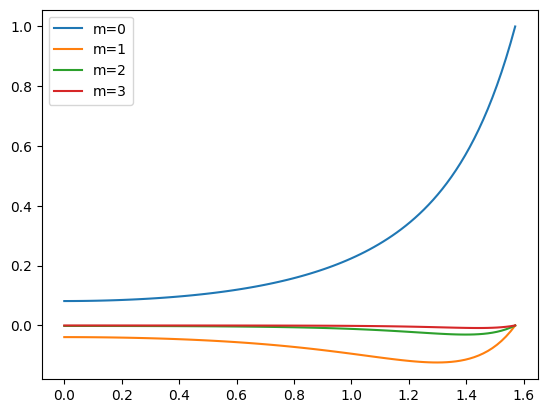

In [ ]:
C0_bruteforce = C[:, 0]
C1_bruteforce = C[:, 1]
C2_bruteforce = C[:, 2]
C3_bruteforce = C[:, 3]

plt.plot(theta, C0_bruteforce, label='m=0')
plt.plot(theta, C1_bruteforce, label='m=1')
plt.plot(theta, C2_bruteforce, label='m=2')
plt.plot(theta, C3_bruteforce, label='m=3')
plt.legend()
plt.show()

In [ ]:
print(np.allclose(C0, C0_bruteforce) and np.allclose(C1, C1_bruteforce) and np.allclose(C2, C2_bruteforce) and np.allclose(C3, C3_bruteforce))

True


In [ ]:
# ??? why does it not match the one in their paper?
# ok well just carry on with it i guess
def reflectance_at_wavelength_for_thickness(thickness, wavelength):
  # assume that bubble's refractive index ~ water, which is basically constant (1.33)
  # also assume angle = 0 (light is coming from straight on
  if isinstance(thickness, np.ndarray):
    R_thickness = []
    for t in thickness:
      C_k, phi = calculate_c_bruteforce(5, 1000, 0.0, 1.0, 4.0 / 3.0, 1.2-0.5j, wavelength=wavelength, thickness=t)
      R = C_k[0] + 2.0 * np.sum(C_k[1:] * np.cos(np.arange(1,6) * phi))
      R_thickness.append(R)
    return np.array(R_thickness)
  else:
    C_k, phi = calculate_c_bruteforce(5, 1000, 0.0, 1.0, 4.0 / 3.0, 1.2-0.5j, wavelength=wavelength, thickness=thickness)
    R = C_k[0] + 2.0 * np.sum(C_k[1:] * np.cos(np.arange(1,6) * phi))
    return R


def plot_reflectance_vs_wavelength_for_thickness(thickness):
  R_vs_lambda = []
  for wavelength in np.linspace(740, 380, 100):
    R = reflectance_at_wavelength_for_thickness(thickness, wavelength)
    R_vs_lambda.append(R)

  plt.plot(np.linspace(740, 380, 100), R_vs_lambda)
  plt.show()

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [ ]:
interact(plot_reflectance_vs_wavelength_for_thickness, thickness=widgets.IntSlider(min=0, max=1000, step=1, value=50))

interactive(children=(IntSlider(value=50, description='thickness', max=1000), Output()), _dom_classes=('widget…

<function __main__.plot_reflectance_vs_wavelength_for_thickness(thickness)>

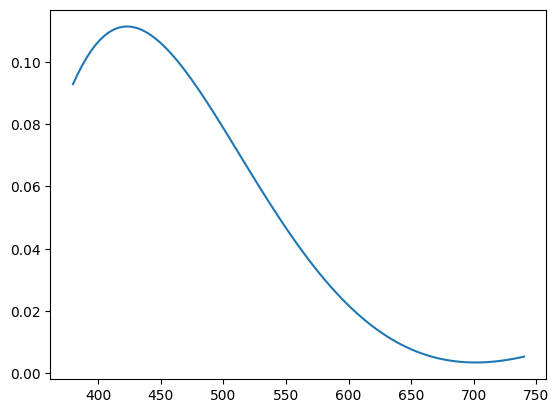

In [ ]:
plot_reflectance_vs_wavelength_for_thickness(200)

In [ ]:
# from stackexchange: https://physics.stackexchange.com/questions/391563/what-can-be-the-simplest-way-to-find-the-thickness-of-a-soap-bubble
def reflectance_vs_wavelength_for_thickness_formula(wavelength, thickness):
  return 0.5 + 0.5 * np.cos(4.0 * np.pi * 1.33 * thickness / (2.0 * wavelength) - np.pi)

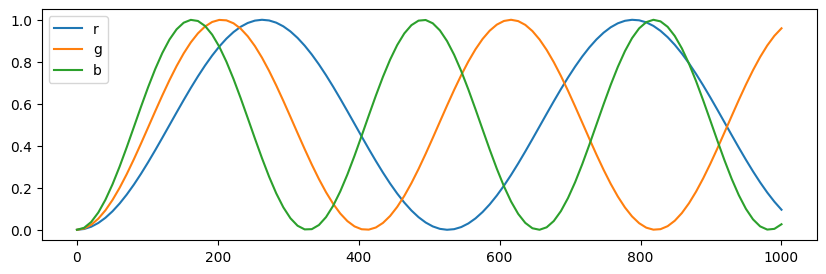

In [ ]:
# maximum of CIE-XYZ CMFs for R, G, B
r_wavelength = 700
g_wavelength = 546.1
b_wavelength = 435.8
thicknesses = np.linspace(0, 1000, 100)
plt.figure(figsize=(10, 3))
plt.plot(thicknesses, reflectance_vs_wavelength_for_thickness_formula(r_wavelength, thicknesses), label='r')
plt.plot(thicknesses, reflectance_vs_wavelength_for_thickness_formula(g_wavelength, thicknesses), label='g')
plt.plot(thicknesses, reflectance_vs_wavelength_for_thickness_formula(b_wavelength, thicknesses), label='b')
plt.legend()
plt.show()

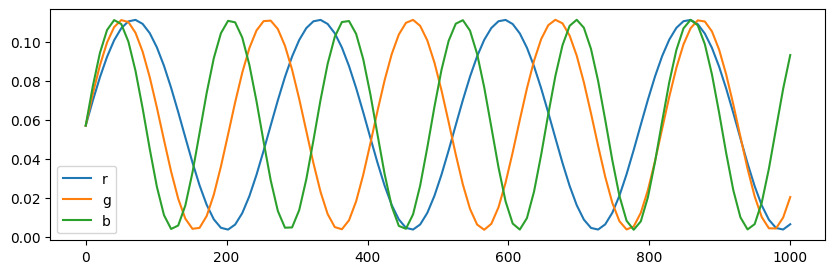

In [ ]:
r_wavelength = 700
g_wavelength = 546.1
b_wavelength = 435.8
thicknesses = np.linspace(0, 1000, 100)

plt.figure(figsize=(10, 3))
plt.plot(thicknesses, reflectance_at_wavelength_for_thickness(thicknesses, r_wavelength), label='r')
plt.plot(thicknesses, reflectance_at_wavelength_for_thickness(thicknesses, g_wavelength), label='g')
plt.plot(thicknesses, reflectance_at_wavelength_for_thickness(thicknesses, b_wavelength), label='b')
plt.legend()
plt.show()

In [ ]:
print(reflectance_at_wavelength_for_thickness(222, 400))

0.07063321066609068


In [ ]:
# Pochi Yeh - Optical Waves in Layered Media (2005), chapter 4.1
def R_analytic(theta_i, eta_1, eta_2, eta_3, wavelength, thickness):
  cos_theta_i = np.cos(theta_i)

  r12_s, t12_s, r12_p, t12_p, cos_theta_2 = fresnel_coeffs(cos_theta_i, eta_1, eta_2)
  # print("1|2 boundary: ", r12_s, t12_s, r12_p, t12_p)

  # might not work if eta_2 < eta_1 due to total internal reflection (we can safely ignore this case since eta_1 should basically always just be air)
  # vertical angles
  r23_s, t23_s, r23_p, t23_p, _ = fresnel_coeffs(cos_theta_2, eta_2, eta_3)
  # print("2|3 boundary: ", r23_s, t23_s, r23_p, t23_p)

  # reflection -> vertical angles
  r21_s, t21_s, r21_p, t21_p, _ = fresnel_coeffs(cos_theta_2, eta_2, eta_1)
  # print("2|1 boundary: ", r21_s, t21_s, r21_p, t21_p)

  optical_path_difference = 2.0 * eta_2 * thickness * cos_theta_2
  delta_phi = 2.0 * np.pi * (1.0 / wavelength) * optical_path_difference

  r_s = (r12_s + r23_s * np.exp(-1.0j * delta_phi)) / (1.0 + r12_s * r23_s * np.exp(-1.0j * delta_phi))
  # print(r_s)
  return np.abs(r_s) ** 2

In [ ]:
R_analytic(0.0, 1.0, 4.0 / 3.0, 1.2+0.5j, wavelength=400, thickness=222)

(-0.185324931494+0.190493781601j)


0.070633211061959356

In [ ]:
reflectance_at_wavelength_for_thickness(222, 400)

0.07063321066609068

In [ ]:
# sign convention is off between the two, but not important for the actual use case we're working on

In [ ]:
!pip install colour-science

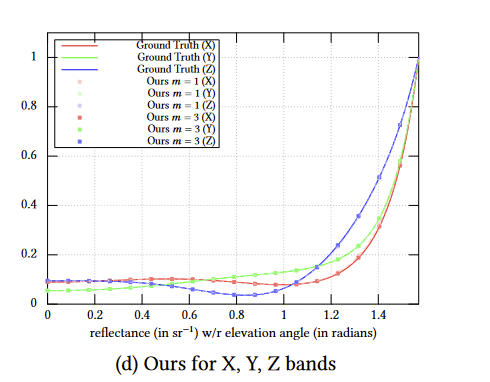

parameters: eta_2 = 1.5, thickness = 525 nm, eta_3 = 1.09

In [ ]:
import colour

/usr/local/lib/python3.10/dist-packages/colour/utilities/verbose.py:265: ColourWarning: "vaab/colour" was detected in "sys.path", please define a "COLOUR_SCIENCE__COLOUR__IMPORT_VAAB_COLOUR=True" environment variable to import its objects into "colour" namespace!
  warn(*args, **kwargs)  # noqa: B028


In [ ]:
def reflectance_spectra(theta_i, eta_1, eta_2, eta_3, thickness):
  spectra = {}
  for wavelength in range(380, 740, 1):
    spectra[wavelength] = R_analytic(theta_i, eta_1, eta_2, eta_3, wavelength=wavelength, thickness=thickness)
  return colour.SpectralDistribution(spectra)

In [ ]:
# create spectra, then convert to XYZ, then convert to RGB
xyz = []
for angle in np.linspace(0.0, np.pi / 2.0, 100):
  spectra = reflectance_spectra(angle, 1.0, 1.5, 1.09, 525)
  xyz.append(colour.sd_to_XYZ(spectra, method='integration'))

xyz = np.array(xyz) / 100.0

In [ ]:
print(xyz.shape)

(100, 3)


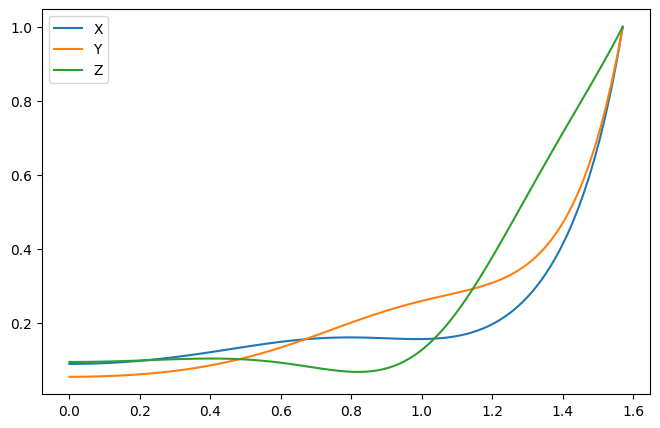

In [ ]:
X = xyz[:, 0]
Y = xyz[:, 1]
Z = xyz[:, 2]
angles = np.linspace(0.0, np.pi / 2.0, 100)

plt.figure(figsize=((np.pi / 2.0) / 0.2, 1.0 / 0.2))
plt.plot(angles, X, label='X')
plt.plot(angles, Y, label='Y')
plt.plot(angles, Z, label='Z')
plt.legend()
plt.show()

In [ ]:
# plot doesn't match exactly, but it should be ok. roughly the same shape, and its unclear how they did
# spectra to XYZ conversion

(360.0, 830.0, 1.0)


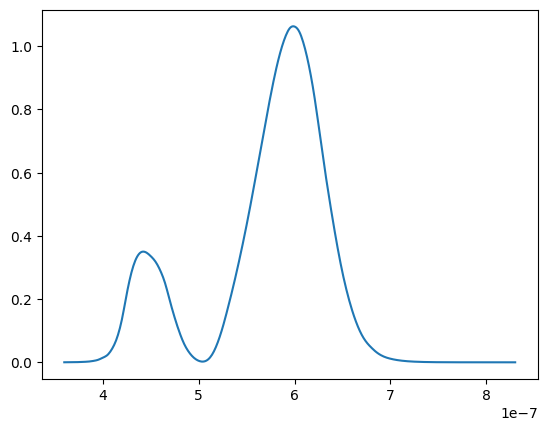

In [ ]:
observer_X, observer_Y, observer_Z = colour.MSDS_CMFS['cie_2_1931'].to_sds()
print(observer_X.shape)
plt.plot(observer_X.wavelengths * 1e-9, observer_X.values)
plt.show()

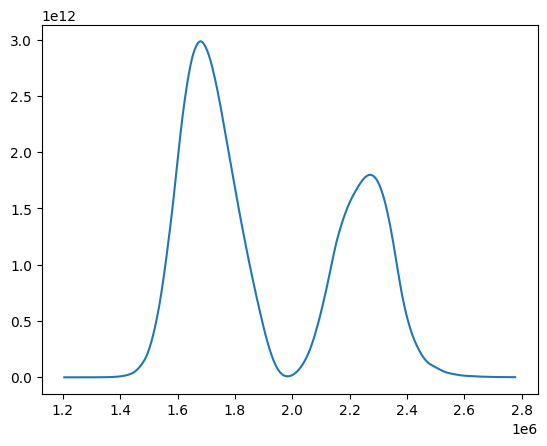

In [ ]:
sensitivity_X_frequencies = 1.0 / (observer_X.wavelengths * 1e-9) # regular, not angular frequencies
sensitivity_X_values = observer_X.values * (sensitivity_X_frequencies ** 2)
plt.plot(sensitivity_X_frequencies, sensitivity_X_values)
plt.show()